In [63]:
import pandas as pd
%matplotlib inline

Reading the Data

In [64]:
mortality_rates=pd.read_csv('mortality.csv')
mortality_rates.shape

(5044, 5)

In [65]:
mortality_rates.isnull().sum()

Country                                                                                      0
Year                                                                                         0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)    0
Neonatal mortality rate (per 1000 live births)                                               0
Under-five mortality rate (probability of dying by age 5 per 1000 live births)               0
dtype: int64

In [66]:
mortality_rates.columns

Index(['Country', 'Year',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)',
       'Neonatal mortality rate (per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births)'],
      dtype='object')

In [67]:
# modify the name of one field
mortality_rates.rename(columns={'Under-five mortality rate (probability of dying by age 5 per 1000 live births)':'under5m_rate'},inplace=True)

In [68]:
mortality_rates.head()

,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),under5m_rate
0,Afghanistan,2015,66.3 [52.7-83.9],35.5 [19.2-56.4],91.1 [69.6-118.8]
1,Afghanistan,2014,68.1 [55.7-83.6],36.1 [19.5-57.5],93.9 [74.5-118.3]
2,Afghanistan,2013,69.9 [58.7-83.5],36.8 [20.1-58.6],96.7 [79.1-118.2]
3,Afghanistan,2012,71.7 [61.6-83.7],37.4 [20.4-60.0],99.5 [83.8-118.5]
4,Afghanistan,2011,73.4 [64.4-84.2],38.1 [20.7-61.0],102.3 [88.1-119.3]


In [69]:
mortality_rates=mortality_rates[['Country','Year','under5m_rate']]    #used to get lesser fiels from a larger data

In [70]:
mortality_rates.columns
mortality_rates.head()

,Country,Year,under5m_rate
0,Afghanistan,2015,91.1 [69.6-118.8]
1,Afghanistan,2014,93.9 [74.5-118.3]
2,Afghanistan,2013,96.7 [79.1-118.2]
3,Afghanistan,2012,99.5 [83.8-118.5]
4,Afghanistan,2011,102.3 [88.1-119.3]


In [71]:
def slice_rates(rate):
    return float(rate.split(' ')[0])     #split the data

In [72]:
# modify the field "under5m_rate" present in morttality_rates
mortality_rates['under5m_rate']=mortality_rates['under5m_rate'].apply(slice_rates)  

In [73]:
mortality_rates.head()

,Country,Year,under5m_rate
0,Afghanistan,2015,91.1
1,Afghanistan,2014,93.9
2,Afghanistan,2013,96.7
3,Afghanistan,2012,99.5
4,Afghanistan,2011,102.3


In [74]:
mortality_rates.shape  #number of rows and columns

(5044, 3)

In [75]:
# to sort the items having common "Year" and different "under5m_rate" 
mortality_rates[ mortality_rates['Year'] == 1990].sort_values(by = 'under5m_rate')[:5]


,Country,Year,under5m_rate
2235,Japan,1990,6.3
2001,Iceland,1990,6.4
1585,Finland,1990,6.7
4341,Sweden,1990,6.9
3613,Republic of Korea,1990,7.1


In [76]:
def yearly_data(year):
    m_rates=mortality_rates[mortality_rates['Year']==year].copy()
    m_rates.drop('Year',axis=1,inplace=True)
    m_rates.set_index('Country',inplace=True)
    return m_rates.sort_values(by='under5m_rates')

In [77]:
def country_data(country):
    
    country_df = mortality_rates[mortality_rates['Country']==country].copy()
    
    #slicing data for the particular country
    country_df.drop('Country',axis=1,inplace=True)
    #dropping the country cou=lumn which is new irrelvant
    country_df.set_index('Year',inplace=True)
    #setting the inde as year to facilitate easier merge operations
    country_df.columns=[country]
    #setting the name of the column to the country name
    return country_df

In [78]:
sweden_data=country_data('Sweden')
india_data=country_data('India')
mali_data=country_data('Mali')

In [79]:
sweden_data.head()

,Sweden
Year,
2015,3.0
2014,3.0
2013,3.0
2012,3.0
2011,3.0


In [80]:
mali_data.head()

,Mali
Year,
2015,114.7
2014,118.3
2013,122.7
2012,127.0
2011,131.7


In [81]:
india_data.head()

,India
Year,
2015,47.7
2014,49.8
2013,52.1
2012,54.5
2011,57.2


In [82]:
#merging the data for the three countries into single data
india_sweden=india_data.merge(sweden_data,left_index=True,right_index=True)

three_countries=india_sweden.merge(mali_data,left_index=True,right_index=True)

In [83]:
three_countries.head()

,India,Sweden,Mali
Year,,,
2015,47.7,3.0,114.7
2014,49.8,3.0,118.3
2013,52.1,3.0,122.7
2012,54.5,3.0,127.0
2011,57.2,3.0,131.7


##### finding mean of all the countries:

In [84]:
#import pandas as pd
world_mortality_rates=pd.Series()    #initialising an empty series

for year,group in mortality_rates.groupby('Year'):
    #print(group)
    #break
    world_mortality_rates=world_mortality_rates.append(pd.Series(group['under5m_rate'].mean(),index=[year]))

In [85]:
world_mortality_rates.head()

1990    72.543299
1991    71.063402
1992    69.684021
1993    68.422680
1994    67.624742
dtype: float64

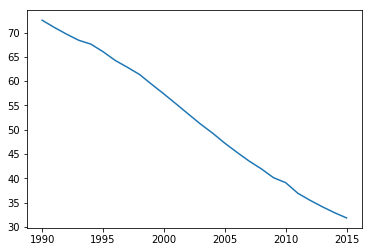

In [86]:
world_mortality_rates.plot()

In [87]:
import pandas as pd
countries = pd.read_csv('countries.csv')
countries.head()
countries = countries[['DisplayString','WHO_REGION','WORLD_BANK_INCOME_GROUP']]
countries=countries.dropna()    #drop the null values
countries.isnull().sum()

DisplayString              0
WHO_REGION                 0
WORLD_BANK_INCOME_GROUP    0
dtype: int64

In [88]:
#mortality_rates=pd.read_csv('mortality_processed.csv)

meta_data=mortality_rates.merge(countries,left_on='Country',right_on='DisplayString')
meta_data.drop(['DisplayString','Country'],axis=1,inplace=True)
#dropping the column we no longer need

In [89]:
# creating a empty data frame that shall store average performance of different regions
regions=meta_data['WHO_REGION'].unique()
years=meta_data['Year'].unique()
regional_trends=pd.DataFrame(columns=regions,index=years)
regional_trends.head()

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2015,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# filling the regional_trend dataframe year wise and regional wise
for name, group in meta_data.groupby(['WHO_REGION','Year']):
    region, year=name
    #print(name)
    #print(group)
    #break
    regional_trends.loc[year, region]=group['under5m_rate'].mean()
    
regional_trends.head(2)

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2015,33.6952,8.93269,71.863,18.3714,22.9556,30.8545
2014,34.8333,9.27115,74.3674,18.8886,23.6815,32.1273


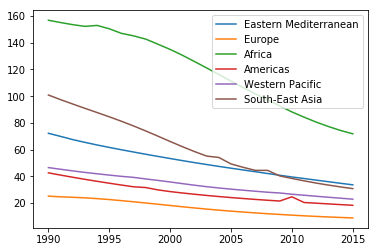

In [91]:
regional_trends.plot()

In [92]:
regions=meta_data['WORLD_BANK_INCOME_GROUP'].unique()
years=meta_data['Year'].unique()
income_trends=pd.DataFrame(columns=regions,index=years)
income_trends.head()

,Low-income,Upper-middle-income,High-income,Not classified,Lower-middle-income
2015,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN


In [93]:
for name, group in meta_data.groupby(['WORLD_BANK_INCOME_GROUP','Year']):
    region, year=name
    #print(name)
    #print(group)
    #break
    income_trends.loc[year, region]=group['under5m_rate'].mean()
    
income_trends.head(2)

,Low-income,Upper-middle-income,High-income,Not classified,Lower-middle-income
2015,77.4469,22.8426,6.44286,12.5,40.7122
2014,80.2469,23.55,6.625,12.9,42.1408


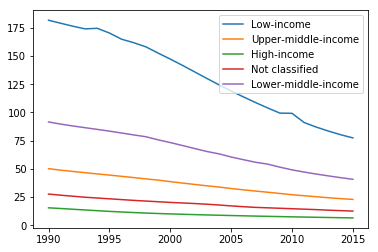

In [94]:
income_trends.plot()